## Vasculature markers and frequency plotting

In [1]:
import sys 
import os
from datetime import datetime
today = datetime.today().strftime('%Y-%m-%d')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scanpy as sc
import anndata as ad
import hdf5plugin

# Add repo path to sys path (allows to access scripts and metadata from repo)
repo_path = '/nfs/team205/vk8/projects/thymus_ageing_atlas/FB_Vascular_compartment'
sys.path.insert(1, repo_path) 
sys.path.insert(2, '/nfs/team205/vk8/projects/thymus_ageing_atlas/General_analysis/scripts')


In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" # to show output from all the lines in a cells
pd.set_option('display.max_column',None) # display all the columns in pandas
pd.options.display.max_rows = 100

In [3]:
# Define plot and path dirs
plot_path = os.path.join(repo_path, 'plots')
data_path = os.path.join(repo_path, 'data')
model_path = os.path.join(repo_path, 'models')
# Define plot and path dirs
results_path = os.path.join(repo_path, 'results')
general_data_path = '/nfs/team205/vk8/projects/thymus_ageing_atlas/General_analysis/data'

In [4]:
# Formatting
import matplotlib.pyplot as plt
from matplotlib import font_manager
from matplotlib import rcParams
rcParams['pdf.fonttype'] = 42
font_manager.fontManager.addfont("/nfs/team205/ny1/ThymusSpatialAtlas/software/Arial.ttf")
#plt.style.use('/nfs/team205/vk8/projects/thymus_ageing_atlas/General_analysis/scripts/plotting/thyAgeing.mplstyle')


In [5]:
# Import custom scripts
from utils import get_latest_version,update_obs,freq_by_donor
from anno_levels import get_ct_levels, get_ct_palette, age_group_levels, age_group_palette
from plotting.utils import plot_grouped_boxplot, calc_figsize

In [6]:
sc.settings.set_figure_params(dpi = 80, color_map = 'RdPu')
plt.style.use('/nfs/team205/vk8/projects/thymus_ageing_atlas/General_analysis/scripts/plotting/thyAgeing.mplstyle')

### Read in single-cell data (updated)

In [7]:
# Load adata
object_version = 'v5_2025-04-03'
adata = ad.read_h5ad(f'{general_data_path}/objects/rna/thyAgeing_all_scvi_{object_version}.zarr')
# Add final annotations to adata and remove non-annotated cells
ct_anno = pd.read_csv(f'{general_data_path}/objects/rna/thyAgeing_all_scvi_v5_2025-10-15_curatedAnno_v11.csv', index_col = 0)

for c in ct_anno.columns:
    if c in adata.obs.columns:
        adata.obs.drop(c, axis = 1, inplace = True)
adata.obs = adata.obs.join(ct_anno)

adata = adata[~adata.obs['taa_l5'].isnull(),].copy()
# Update metadata
latest_meta_path = get_latest_version(dir = f'{general_data_path}/metadata', file_prefix='Thymus_ageing_metadata')
latest_meta = pd.read_excel(latest_meta_path)

update_obs(adata, latest_meta, on = 'index')


Latest file: Thymus_ageing_metadata_v28_2025-03-13.xlsx
No columns specified to update. Automatically determining columns to update...
Updating columns: ['age', 'age_cont', 'age_group', 'age_group2', 'age_months', 'age_num', 'age_unit', 'chemistry_detail', 'chemistry_orig', 'chemistry_simple', 'cite', 'comment', 'donor', 'health_status', 'in_HTSA', 'library', 'library_bcr', 'library_tcr_ab', 'library_tcr_gd', 'origin_institute', 'path_bcr', 'path_cellbender_gex', 'path_cellranger_arc', 'path_raw_gex', 'path_tcr_ab', 'path_tcr_gd', 'public_data', 'research_no', 'sample', 'sex', 'sort', 'sort_type', 'starsolo_version', 'study', 'type']
On columns: index


In [10]:
adata_vasc = adata[adata.obs['taa_l1'].isin(['EC', 'Mural']),].copy()

In [11]:
from utils_vk8 import regen_embed

In [13]:
sc.settings.set_figure_params(dpi = 150, color_map = 'RdPu')

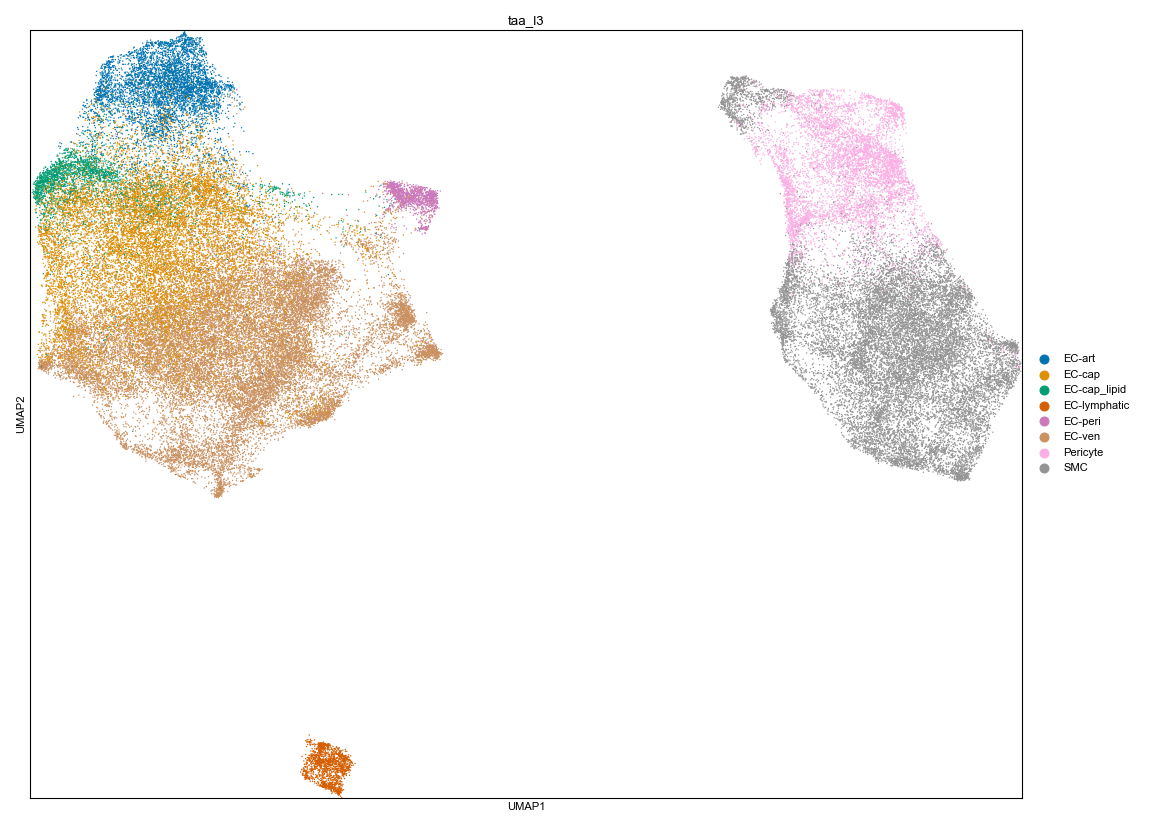

AnnData object with n_obs × n_vars = 76238 × 35530
    obs: 'barcode', 'sample', 'library', 'index', 'library_tcr_ab', 'library_tcr_gd', 'library_bcr', 'path_raw_gex', 'starsolo_version', 'path_cellbender_gex', 'path_cellranger_arc', 'donor', 'chemistry_simple', 'chemistry_detail', 'chemistry_orig', 'origin_institute', 'research_no', 'study', 'sort', 'sort_type', 'in_HTSA', 'public_data', 'type', 'cite', 'health_status', 'age_group', 'age_group2', 'age', 'age_num', 'age_unit', 'age_cont', 'sex', 'age_months', 'path_tcr_ab', 'path_tcr_gd', 'path_bcr', 'comment', 'n_counts', 'n_genes', 'percent_mito', 'percent_ribo', 'percent_hb', 'scrublet_score', 'predicted_doublet', 'anno_status', 'qc_status', 'taa_l0', 'taa_l1', 'taa_l2', 'taa_l2_v2', 'taa_l3', 'taa_l3_v2', 'taa_l4', 'taa_l5'
    var: 'gene_id', 'gene_name'
    uns: '_scvi_manager_uuid', '_scvi_uuid', 'chemistry_simple_colors', 'donor_colors', 'hvg', 'neighbors', 'sex_colors', 'umap', 'taa_l3_colors'
    obsm: 'X_scVI', 'X_umap'
    

In [12]:
regen_embed(adata_vasc, anno2show='taa_l3')

In [17]:
plot_path

'/nfs/team205/vk8/projects/thymus_ageing_atlas/FB_Vascular_compartment/plots'

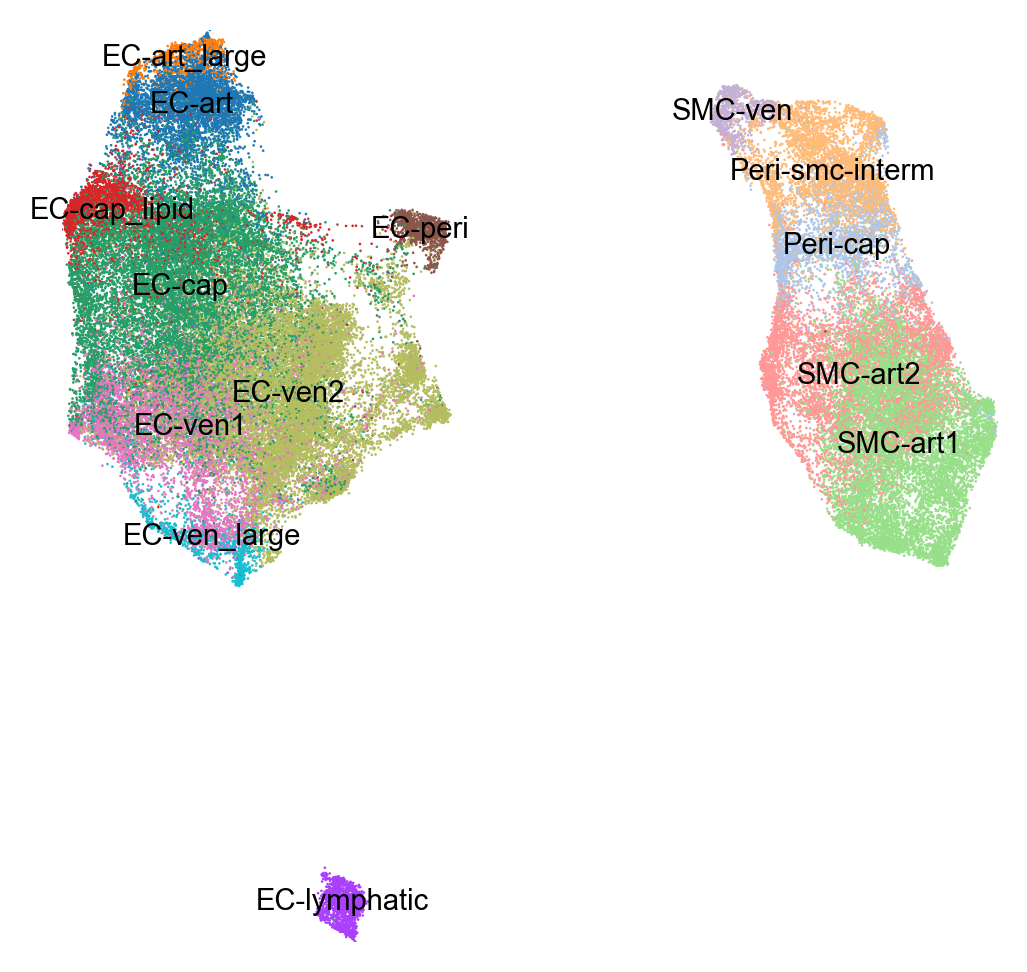

In [21]:
sc.pl.umap(adata_vasc, color = 'taa_l5', legend_loc = 'on data', legend_fontsize = 7, frameon = False, 
           title = '', return_fig = True).savefig(f'{plot_path}/Vasculature_UMAP_color2taa_l5.pdf', dpi = 300)

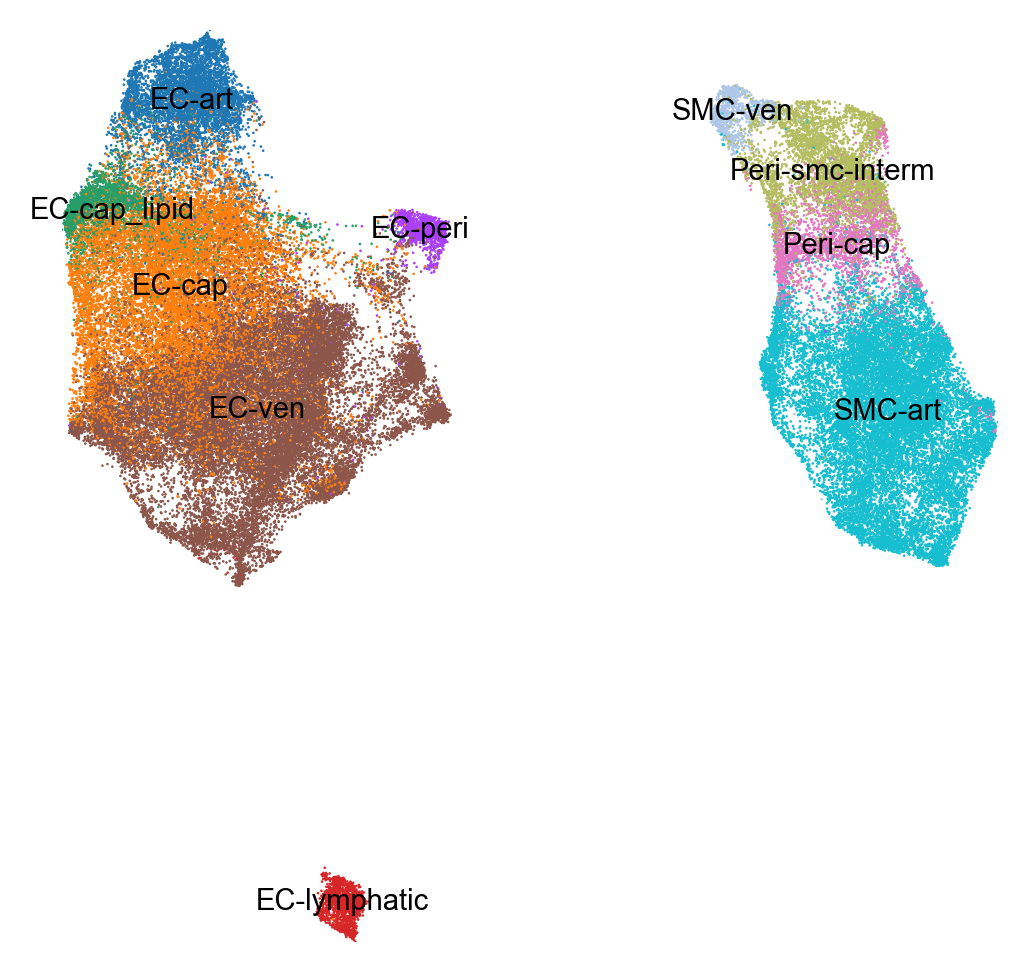

In [22]:
sc.pl.umap(adata_vasc, color = 'taa_l4', legend_loc = 'on data', legend_fontsize = 7, frameon = False, 
           title = '', return_fig = True).savefig(f'{plot_path}/Vasculature_UMAP_color2taa_l4.pdf', dpi = 300)

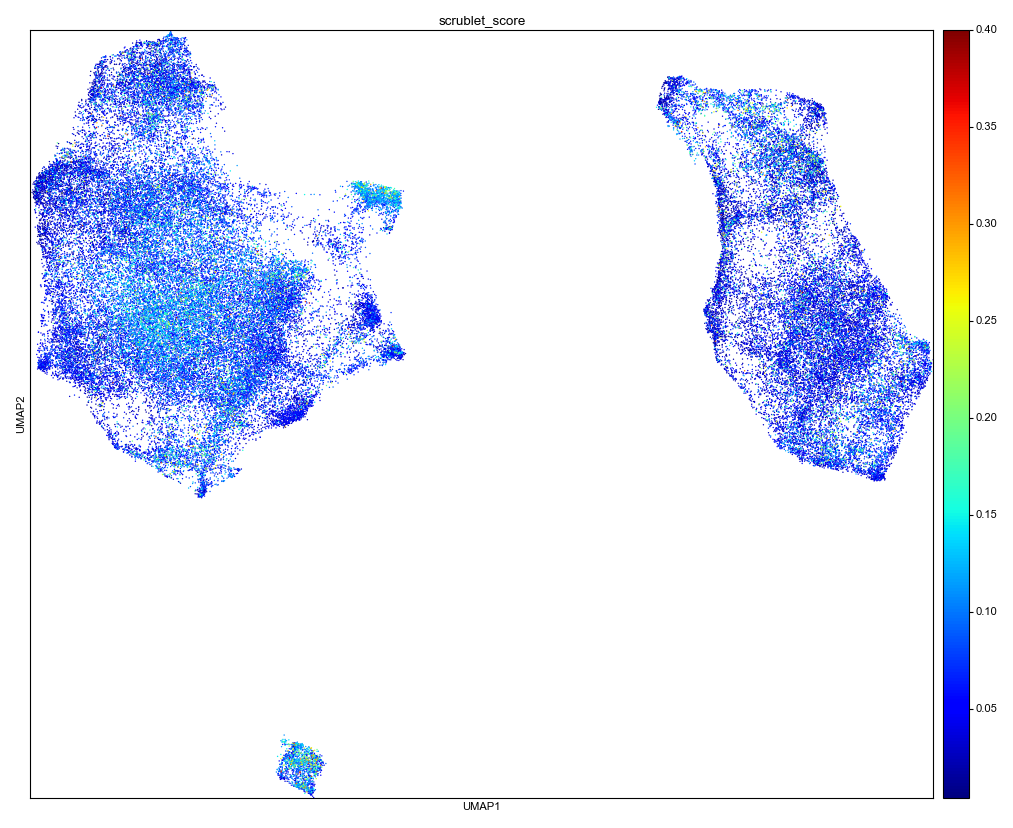

In [65]:
sc.pl.umap(adata_vasc, color = 'scrublet_score', vmax = 0.4, cmap = 'jet')

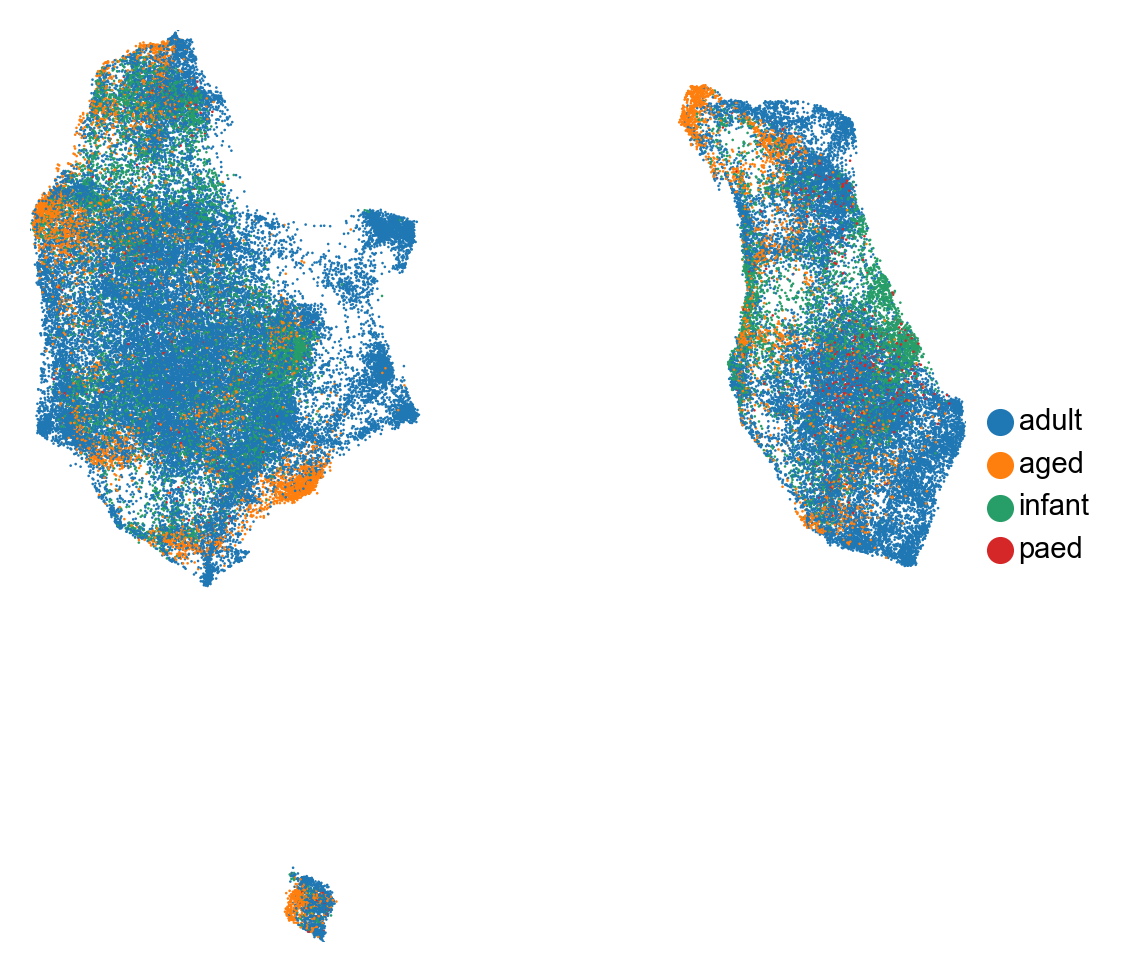

In [23]:
sc.pl.umap(adata_vasc, color = 'age_group', legend_fontsize = 7, frameon = False, 
           title = '', return_fig = True).savefig(f'{plot_path}/Vasculature_UMAP_color2age.pdf', dpi = 300)

In [24]:
vasc_mrkrs = {'pan-vasc': ['PECAM1', 'CDH5','VWF', "EGFL7","CLU"],
                   'large vassels': ['OGN', 'OMD', 'BGN', 'ELN','SULF1'],
                   'large_art_ec': ["BGN","OMD","OGN","EFEMP1"],
                    'art_ec_1': ["ELN","SULF1","COL8A1","ABI3BP","GUCY1A1","SSTR1"],
                    'art_ec_2': ["NEBL","NTRK2","ALPL"],
                  'arteria': ['GJA5', 'ARL15', 'PLLP', 'SERPINE2', 'HEY1', 'SEMA3G', 'DLL4', 'NEBL'],
                   
                  'capillary': ['RGCC', 'GPIHBP1', 'CA4', 'EFNB1', 'FCN3'],
                   'capillary-adipose': ['FABP4', 'FABP5', 'MEOX2', 'TCF15', 'CD36', 'LPL'],
                   'venous': ["ACKR1","NR2F2","PLVAP","POSTN","COL15A1",'SELE', 'C7'],
                    'ven_ec_1': ["POSTN","C7","SELP"],
    'ven_ec_2': ["SELE","ICAM4","CSF3","PCDH19"],
                   'lymphatic': ['PROX1', 'TFF3', 'CCL21']
                  }


smc_mrkrs_dict = {'smc': ['ACTA2', 'MYH11', 'RERGL', 'STEAP4', 'CASQ2'],
                  'pericyte': ['RGS5', 'PDGFRB','ABCC9', 'KCNJ8'],
                   'cytokine subtype': ['CCL19', 'CCL21'],
                  'large vessel': ['COL1A1', 'ELN', 'SULF1'],
                   'prolif': ['MKI67', 'TOP2A'],
                  }

smc_mrkrs_dict2 = {'smc': ['ACTA2', 'MYH11'], 
                   'art_smc': ['RERGL', 'CASQ2', 'KCNAB1'],
                   'ven_smc': ['HMCN2', 'FLNC'],
                  'pericyte': ['ABCC9', 'KCNJ8', 'RGS5', 'AGT'],
                   'peri-smc': ['PDGFRB', 'ACTA2', 'MYH11', 'STEAP4', 'PROCR', 'FGF7', 'CHRDL1'],
                   'cytokine subtype': ['CCL19', 'CCL21'],
                  'large vessel': ['COL1A1', 'ELN', 'SULF1'],
                   'prolif': ['MKI67', 'TOP2A'],
                  }

In [33]:
vasc_mrkrs =  {'pan-vasc': ['PECAM1', 'CDH5','VWF', "EGFL7","CLU"],
                   'large vassels': ['OGN', 'OMD', 'BGN', 'ELN','SULF1'],
                   'large_art_ec': ["BGN","OMD","OGN","EFEMP1"],
                    'art_ec_1': ["ELN","SULF1","COL8A1","ABI3BP","GUCY1A1","SSTR1"],
                    'art_ec_2': ["NEBL","NTRK2","ALPL"],
                  'arteria': ['GJA5', 'ARL15', 'PLLP', 'SERPINE2', 'HEY1', 'SEMA3G', 'DLL4', 'NEBL'],
                   
                  'capillary': ['RGCC', 'GPIHBP1', 'CA4', 'EFNB1', 'FCN3'],
                   'capillary-adipose': ['FABP4', 'FABP5', 'MEOX2', 'TCF15', 'CD36', 'LPL'],
                   'venous': ["ACKR1","NR2F2","PLVAP","POSTN","COL15A1",'SELE', 'C7'],
                    'ven_ec_1': ["POSTN","C7","SELP"],
    'ven_ec_2': ["SELE","ICAM4","CSF3","PCDH19"],
                   'lymphatic': ['PROX1', 'TFF3', 'CCL21'],
               'smc': ['ACTA2', 'MYH11'], 
                   'art_smc': ['RERGL', 'CASQ2', 'KCNAB1'],
                   'ven_smc': ['HMCN2', 'FLNC'],
                  'pericyte': ['ABCC9', 'KCNJ8', 'RGS5', 'AGT'],
                   'peri-smc': ['PDGFRB', 'ACTA2', 'MYH11', 'STEAP4', 'PROCR', 'FGF7', 'CHRDL1'],
                   'cytokine subtype': ['CCL19', 'CCL21'],
                  'large vessel': ['COL1A1', 'ELN', 'SULF1'],
                   'prolif': ['MKI67', 'TOP2A'],
                  }

In [59]:
vasc_mrkrs_filt =  {'pan-vasc': ['PECAM1', 'CDH5','VWF'],
                   'large vassels': ['SULF1', 'ELN', 'OMD', 'OGN'],
                  'arteria': ['GJA5','HEY1', 'SEMA3G', 'DLL4'],
                  'capillary': ['RGCC', 'GPIHBP1', 'CA4',  'FCN3'],
                   'capillary-adipose': ['CD36','TCF15',  'LPL'],
                   'venous': ["ACKR1","PLVAP","POSTN",'SELE', "ICAM4"],
                   'lymphatic': ['PROX1', 'TFF3', 'CCL21'],
               'smc': ['ACTA2', 'MYH11', 'PDGFRB'], 
                   'art_smc': ['RERGL', 'CASQ2', 'KCNAB1'],
                   'ven_smc': ['HMCN2', 'FLNC'],
                  'pericyte': ['ABCC9', 'KCNJ8', 'RGS5',],
                   'peri-smc': ['FGF7', 'CHRDL1'],
                   'cytokine subtype': ['CCL19', 'CCL21'],
                  }

In [55]:
vasc_lev5 = get_ct_levels('taa_l5', taa_l1=['EC', 'Mural'])
vasc_lev4 = get_ct_levels('taa_l4', taa_l1=['EC', 'Mural'])

Latest file: thyAgeing_full_curatedAnno_v11_2025-08-29_levels.xlsx
Latest file: thyAgeing_full_curatedAnno_v11_2025-08-29_levels.xlsx


In [29]:
sc.pp.normalize_total(adata_vasc, target_sum = 1e4)
sc.pp.log1p(adata_vasc)

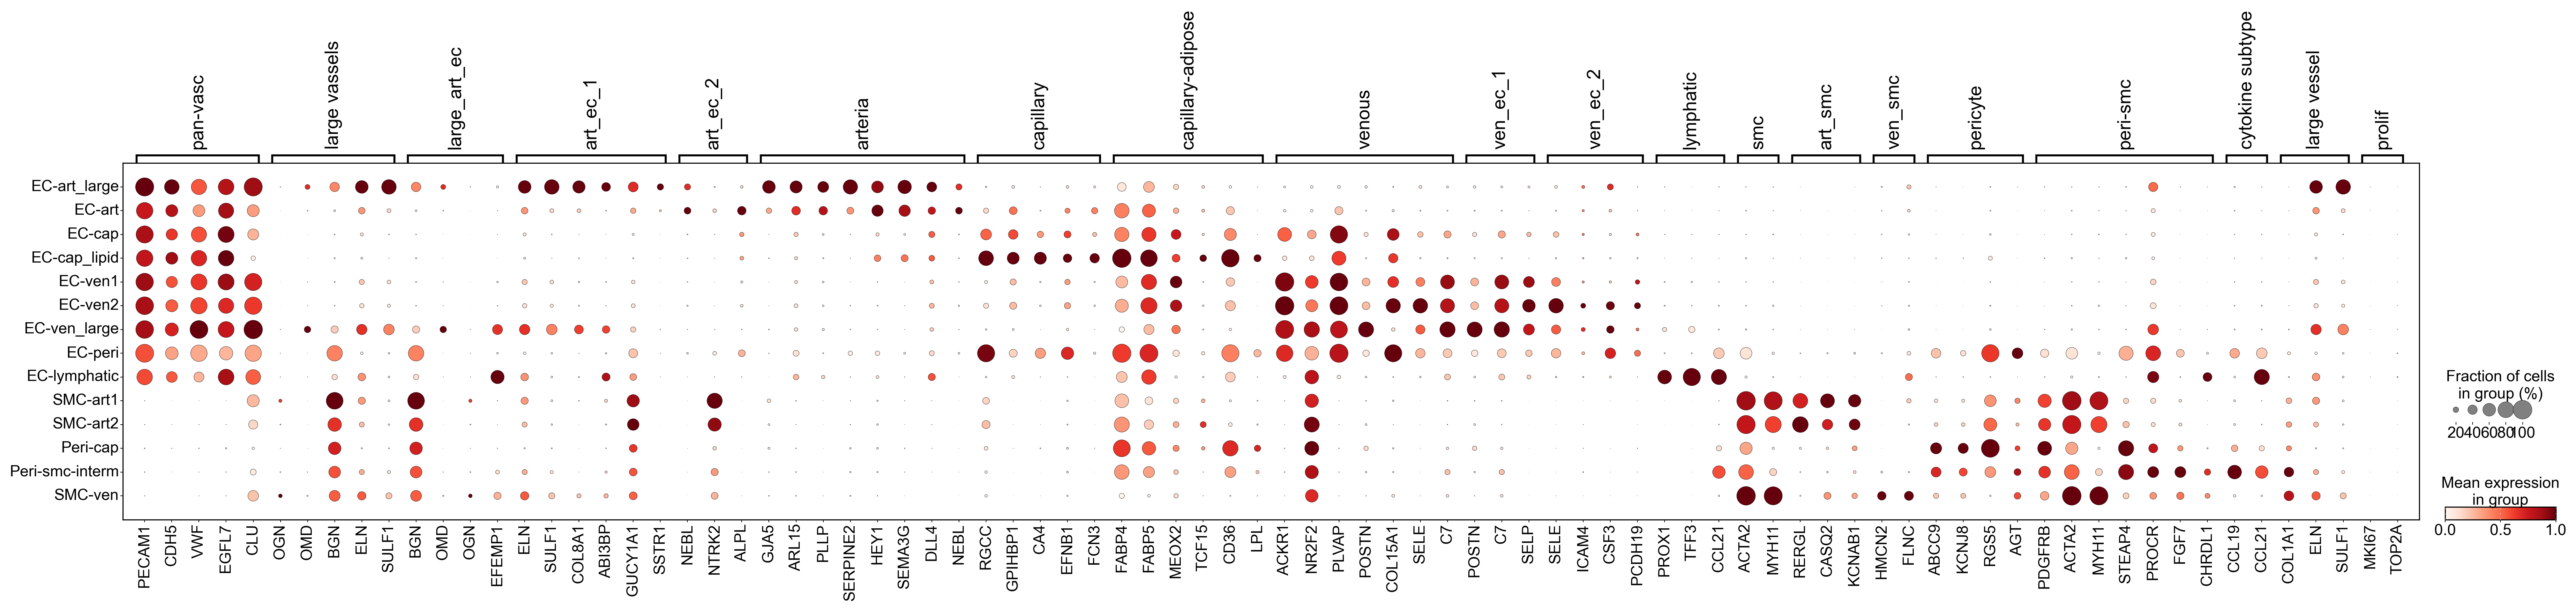

In [36]:
sc.pl.dotplot(adata_vasc, groupby = 'taa_l5', var_names = vasc_mrkrs, categories_order=vasc_ct_levs,
              standard_scale = 'var')

In [38]:
from plotting.utils import plot_grouped_boxplot,thyAgeing_colors

In [40]:
plt.style.use('/nfs/team205/vk8/projects/thymus_ageing_atlas/General_analysis/scripts/plotting/thyAgeing.mplstyle')

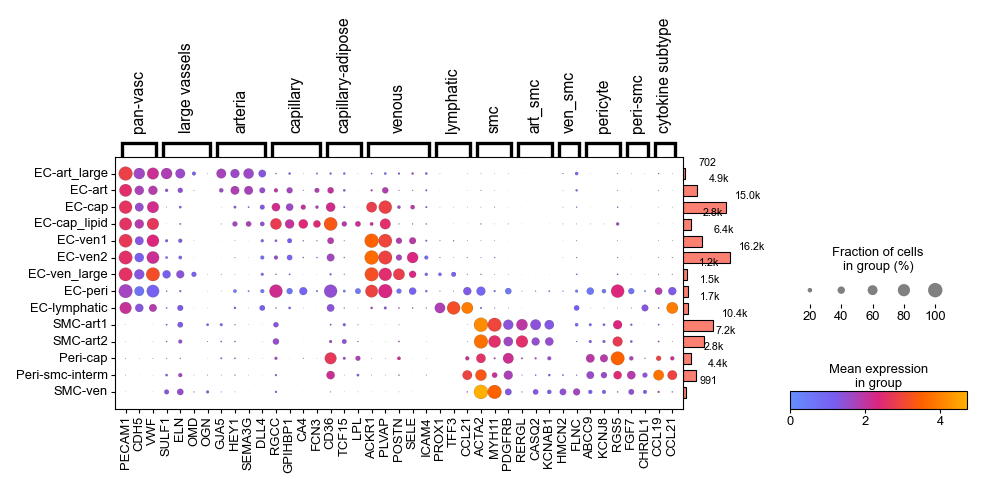

In [61]:
sc.pl.DotPlot(adata_vasc, 
            categories_order=vasc_ct_levs,
            groupby = 'taa_l5',
            var_names=vasc_mrkrs_filt,
            figsize = calc_figsize(width = 175, height = 50),
            mean_only_expressed=True,
            cmap = sns.blend_palette([thyAgeing_colors['blue'], thyAgeing_colors['purple'], thyAgeing_colors['magenta'], thyAgeing_colors['orange'], thyAgeing_colors['yellow']], as_cmap=True,), #'magma',
            ).style(smallest_dot=0, largest_dot = 40, dot_edge_lw=0.05).add_totals(size = 0.5).savefig(f'{plot_path}/thyAgeing_Vasc_taa_l5_Markers_dotplot.pdf') 

In [57]:
vasc_lev4

['EC-art',
 'EC-cap',
 'EC-cap_lipid',
 'EC-ven',
 'EC-peri',
 'EC-lymphatic',
 'SMC-art',
 'Peri-cap',
 'Peri-smc-interm',
 'SMC-ven']

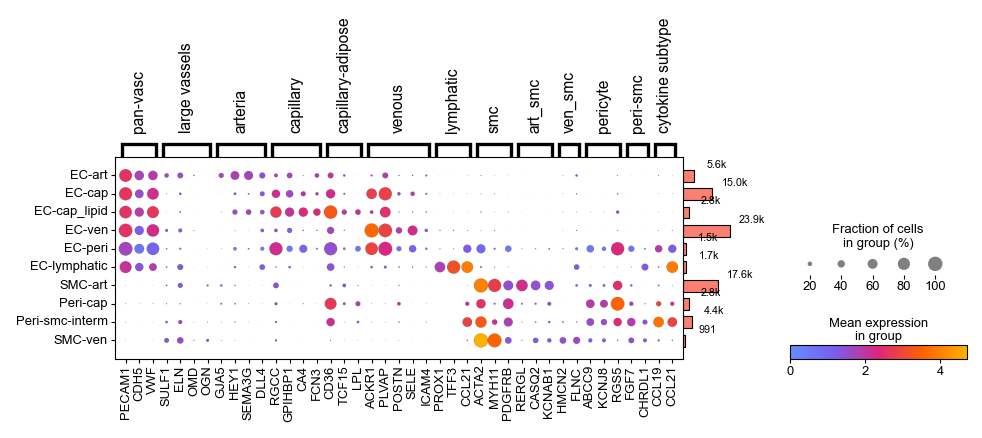

In [62]:
sc.pl.DotPlot(adata_vasc, 
            categories_order=vasc_lev4,
            groupby = 'taa_l4',
            var_names=vasc_mrkrs_filt,
            figsize = calc_figsize(width = 175, height = 40),
            mean_only_expressed=True,
            cmap = sns.blend_palette([thyAgeing_colors['blue'], thyAgeing_colors['purple'], thyAgeing_colors['magenta'], thyAgeing_colors['orange'], thyAgeing_colors['yellow']], as_cmap=True,), #'magma',
            ).style(smallest_dot=0, largest_dot = 40, dot_edge_lw=0.05).add_totals(size = 0.5).savefig(f'{plot_path}/thyAgeing_Vasc_taa_l4_Markers_dotplot.pdf') 

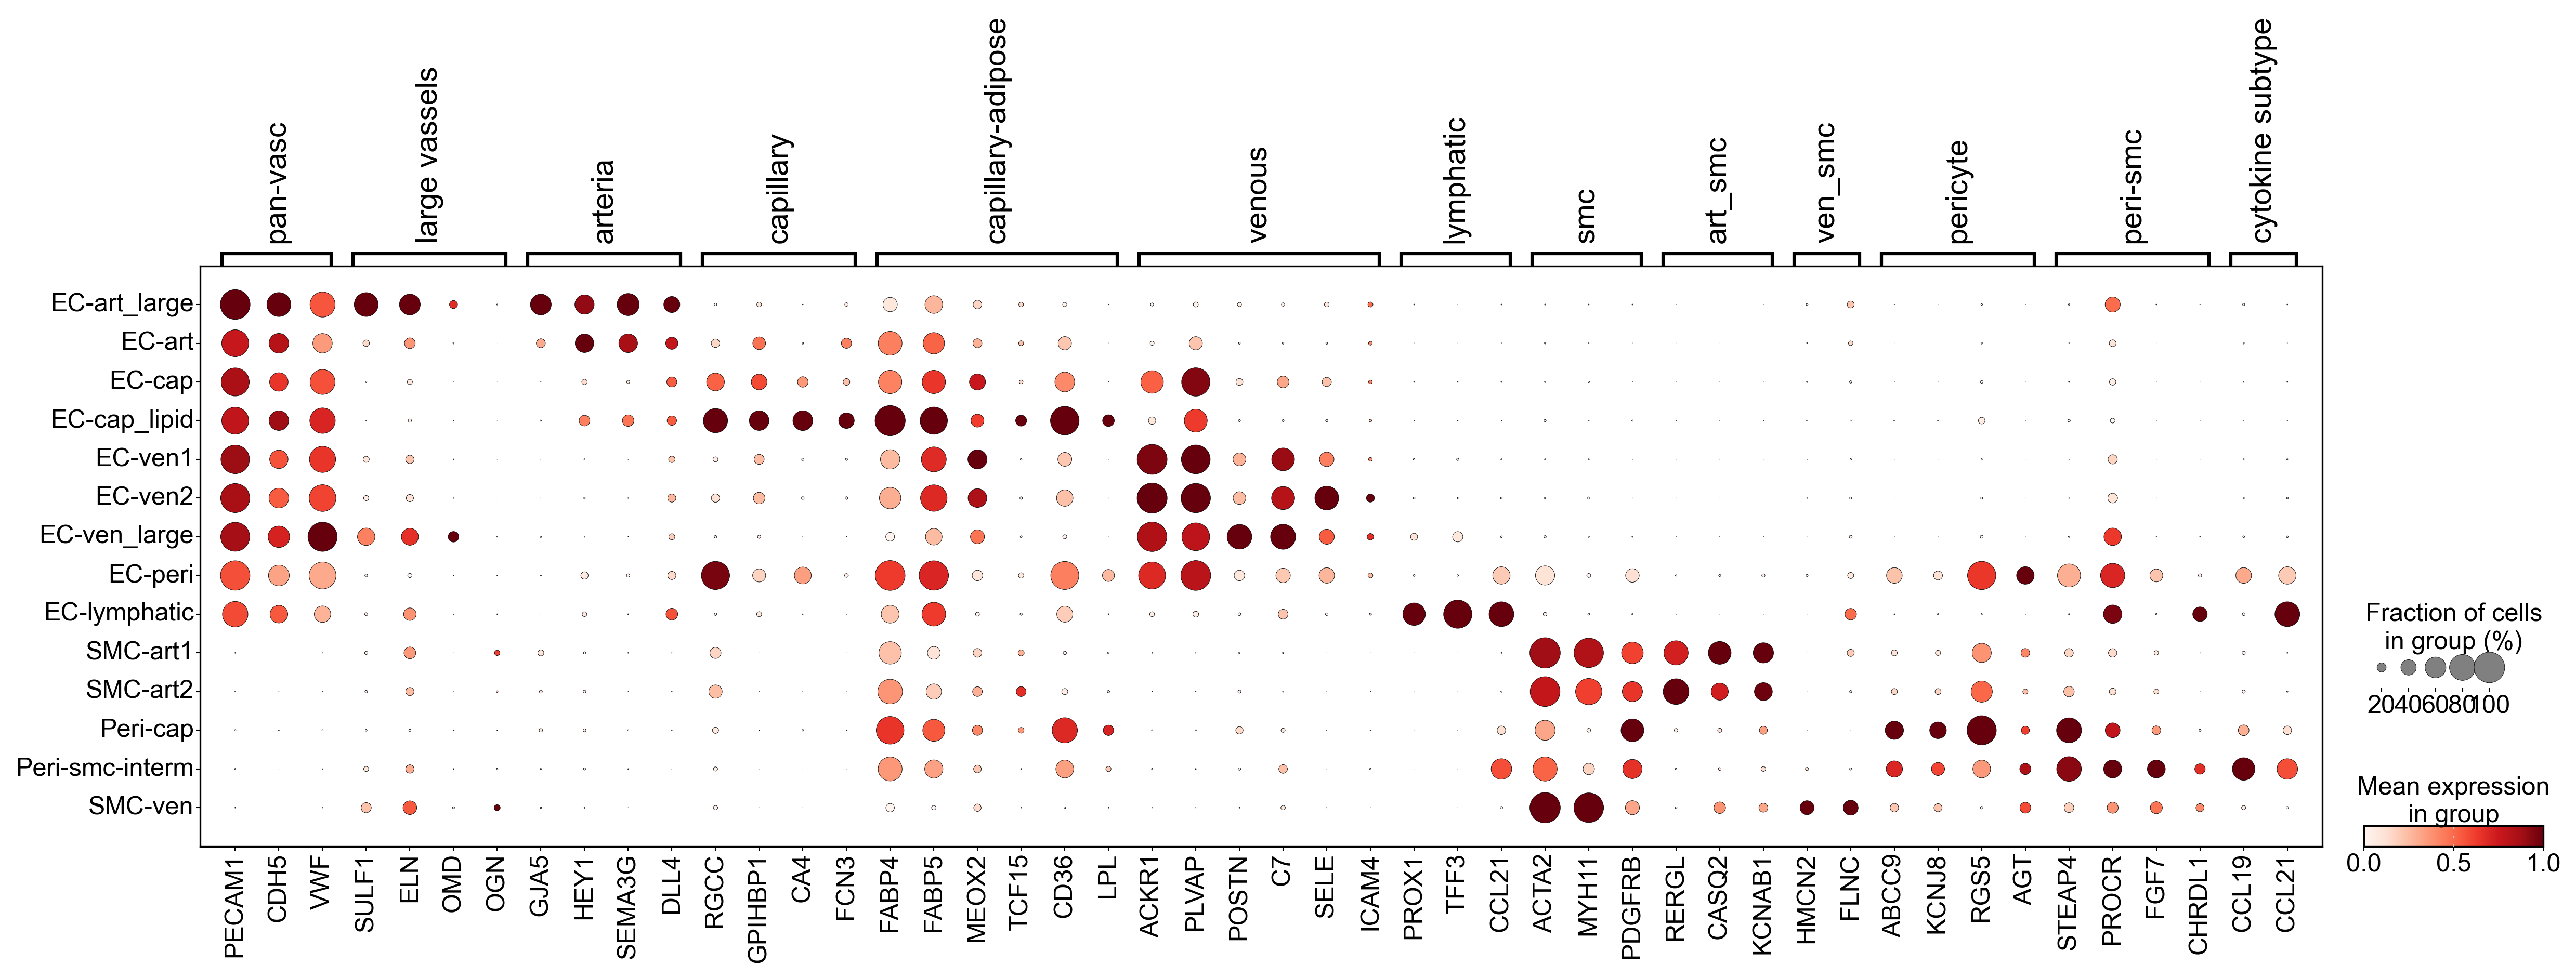

In [35]:
sc.pl.dotplot(adata_vasc, groupby = 'taa_l5', var_names = vasc_mrkrs_filt, categories_order=vasc_ct_levs,
              standard_scale = 'var')

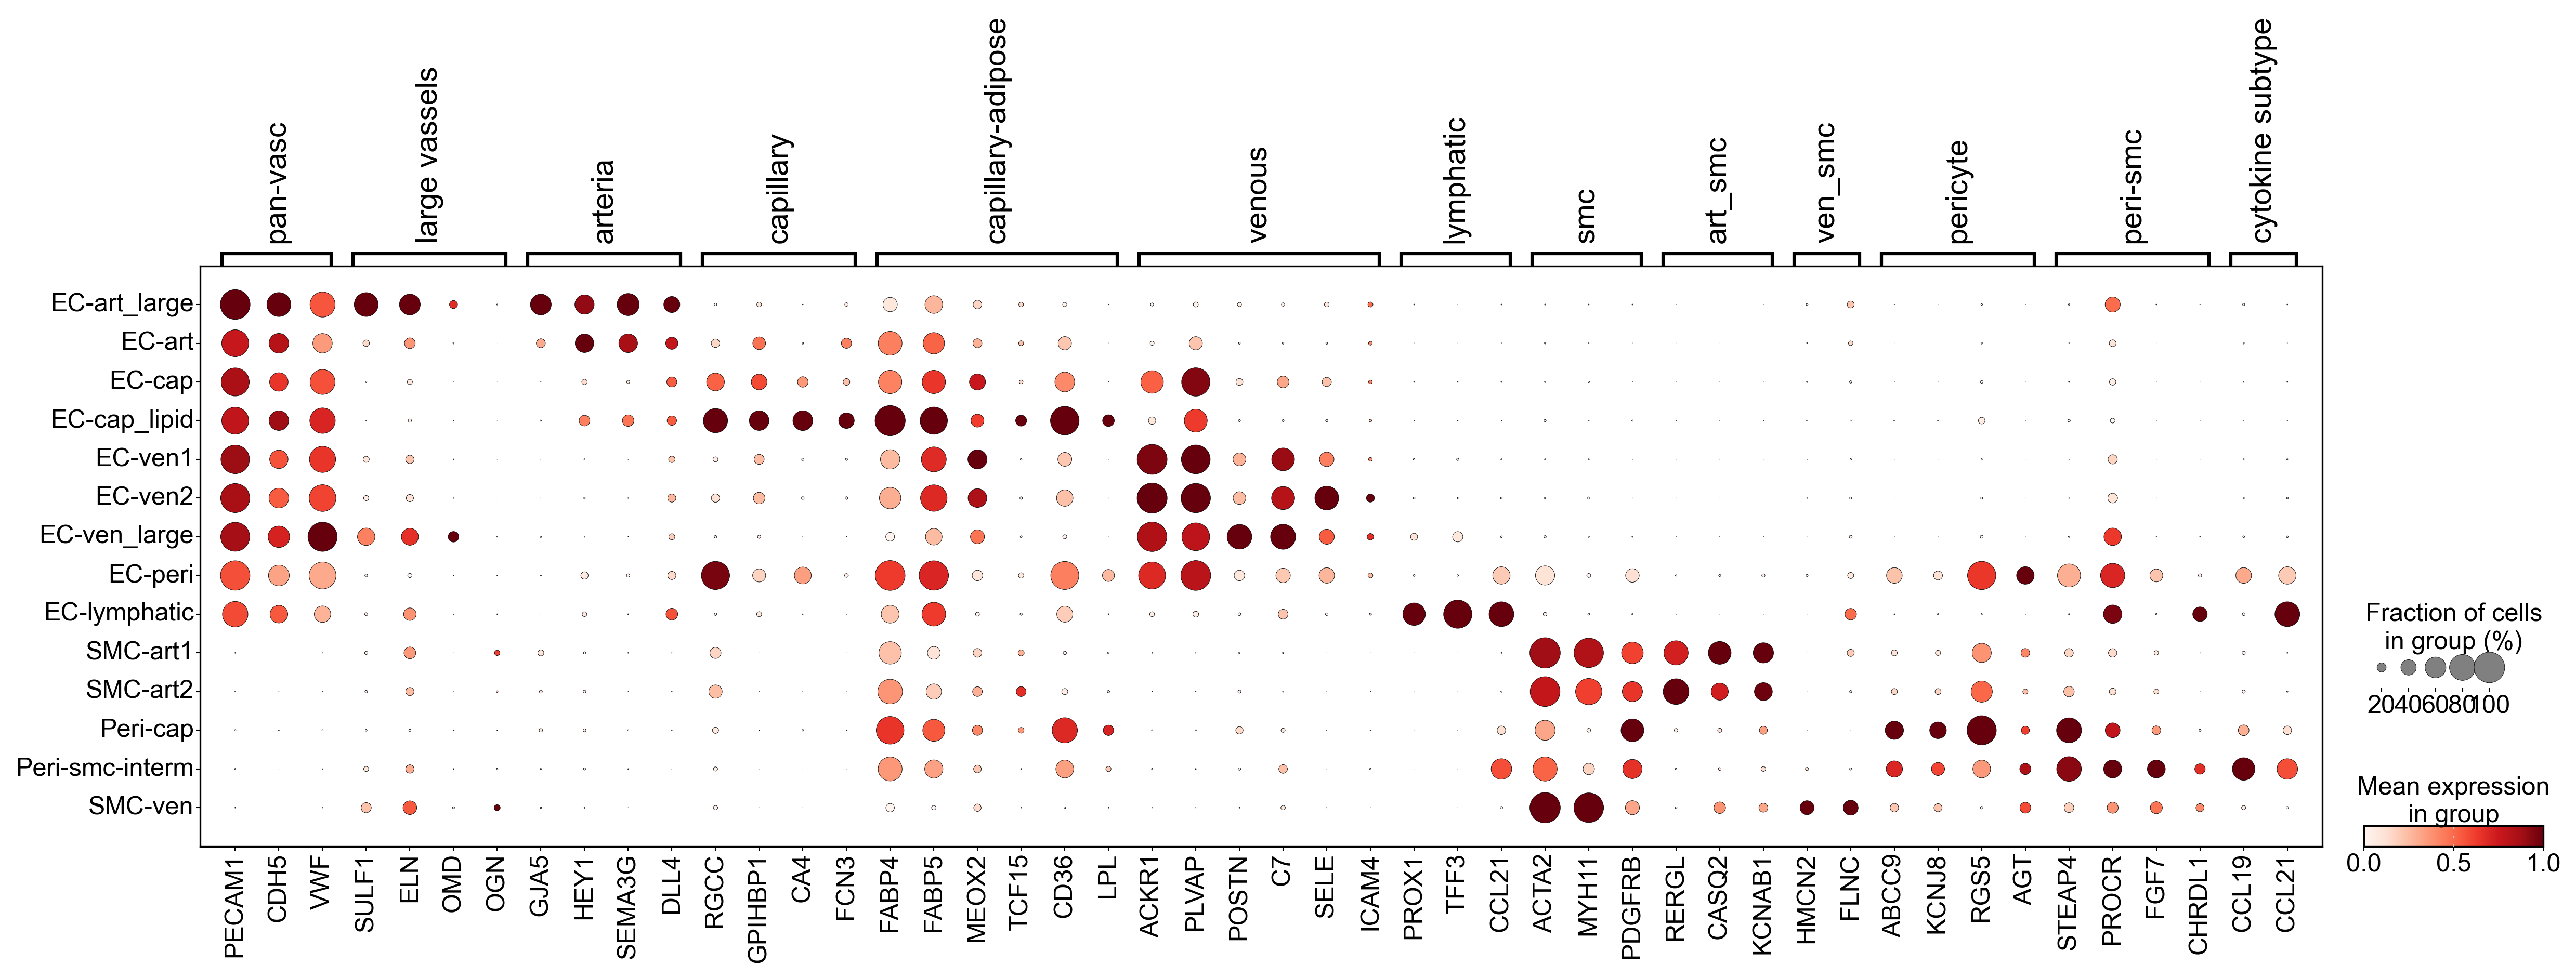

In [35]:
sc.pl.dotplot(adata_vasc, groupby = 'taa_l5', var_names = vasc_mrkrs_filt, categories_order=vasc_ct_levs,
              standard_scale = 'var')

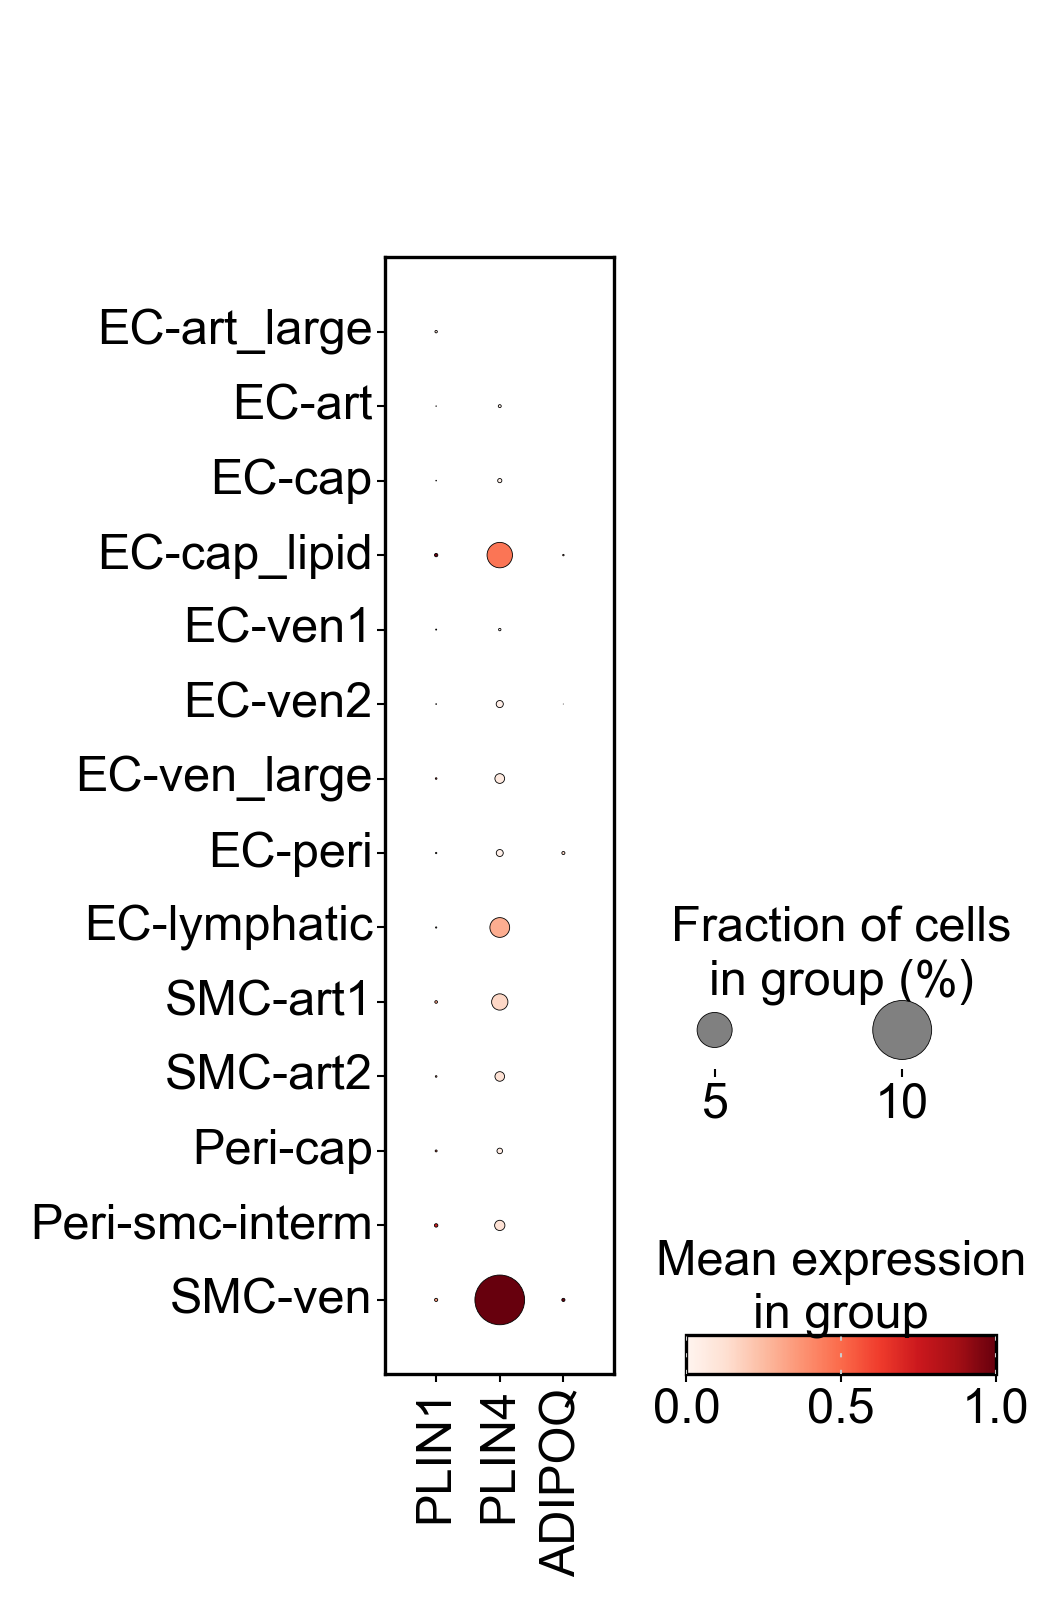

In [31]:
sc.pl.dotplot(adata_vasc, groupby = 'taa_l5', var_names = ['PLIN1', 'PLIN4', 'ADIPOQ'], categories_order=vasc_ct_levs,
              standard_scale = 'var')

In [ ]:
sc.pl.umap()

In [8]:
adata

AnnData object with n_obs × n_vars = 1025298 × 35530
    obs: 'barcode', 'sample', 'library', 'index', 'library_tcr_ab', 'library_tcr_gd', 'library_bcr', 'path_raw_gex', 'starsolo_version', 'path_cellbender_gex', 'path_cellranger_arc', 'donor', 'chemistry_simple', 'chemistry_detail', 'chemistry_orig', 'origin_institute', 'research_no', 'study', 'sort', 'sort_type', 'in_HTSA', 'public_data', 'type', 'cite', 'health_status', 'age_group', 'age_group2', 'age', 'age_num', 'age_unit', 'age_cont', 'sex', 'age_months', 'path_tcr_ab', 'path_tcr_gd', 'path_bcr', 'comment', 'n_counts', 'n_genes', 'percent_mito', 'percent_ribo', 'percent_hb', 'scrublet_score', 'predicted_doublet', 'anno_status', 'qc_status', 'taa_l0', 'taa_l1', 'taa_l2', 'taa_l2_v2', 'taa_l3', 'taa_l3_v2', 'taa_l4', 'taa_l5'
    var: 'gene_id', 'gene_name'
    uns: '_scvi_manager_uuid', '_scvi_uuid', 'chemistry_simple_colors', 'donor_colors', 'hvg', 'neighbors', 'sex_colors', 'umap'
    obsm: 'X_scVI', 'X_umap'
    obsp: 'connecti

In [10]:
adata

AnnData object with n_obs × n_vars = 1025298 × 35530
    obs: 'barcode', 'sample', 'library', 'index', 'library_tcr_ab', 'library_tcr_gd', 'library_bcr', 'path_raw_gex', 'starsolo_version', 'path_cellbender_gex', 'path_cellranger_arc', 'donor', 'chemistry_simple', 'chemistry_detail', 'chemistry_orig', 'origin_institute', 'research_no', 'study', 'sort', 'sort_type', 'in_HTSA', 'public_data', 'type', 'cite', 'health_status', 'age_group', 'age_group2', 'age', 'age_num', 'age_unit', 'age_cont', 'sex', 'age_months', 'path_tcr_ab', 'path_tcr_gd', 'path_bcr', 'comment', 'n_counts', 'n_genes', 'percent_mito', 'percent_ribo', 'percent_hb', 'scrublet_score', 'predicted_doublet', 'anno_status', 'qc_status', 'taa_l0', 'taa_l1', 'taa_l2', 'taa_l2_v2', 'taa_l3', 'taa_l3_v2', 'taa_l4', 'taa_l5'
    var: 'gene_id', 'gene_name'
    uns: '_scvi_manager_uuid', '_scvi_uuid', 'chemistry_simple_colors', 'donor_colors', 'hvg', 'neighbors', 'sex_colors', 'umap'
    obsm: 'X_scVI', 'X_umap'
    obsp: 'connecti

### Read in single-cell data

In [7]:
# Load adata
object_version = 'v5_2025-04-03'
adata = ad.read_h5ad(f'{general_data_path}/objects/rna/thyAgeing_all_scvi_{object_version}.zarr')
# Add final annotations to adata and remove non-annotated cells
ct_anno = pd.read_csv(f'{general_data_path}/objects/rna/thyAgeing_all_scvi_v4_2025-02-04_curatedAnno_v10.csv', index_col = 0)

for c in ct_anno.columns:
    if c in adata.obs.columns:
        adata.obs.drop(c, axis = 1, inplace = True)
adata.obs = adata.obs.join(ct_anno)

adata = adata[~adata.obs['taa_l5'].isnull(),].copy()
# Update metadata
latest_meta_path = get_latest_version(dir = f'{general_data_path}/metadata', file_prefix='Thymus_ageing_metadata')
latest_meta = pd.read_excel(latest_meta_path)

update_obs(adata, latest_meta, on = 'index')


Latest file: Thymus_ageing_metadata_v28_2025-03-13.xlsx
No columns specified to update. Automatically determining columns to update...
Updating columns: ['age', 'age_cont', 'age_group', 'age_group2', 'age_months', 'age_num', 'age_unit', 'chemistry_detail', 'chemistry_orig', 'chemistry_simple', 'cite', 'comment', 'donor', 'health_status', 'in_HTSA', 'library', 'library_bcr', 'library_tcr_ab', 'library_tcr_gd', 'origin_institute', 'path_bcr', 'path_cellbender_gex', 'path_cellranger_arc', 'path_raw_gex', 'path_tcr_ab', 'path_tcr_gd', 'public_data', 'research_no', 'sample', 'sex', 'sort', 'sort_type', 'starsolo_version', 'study', 'type']
On columns: index


## Update annotations to v11

In [12]:
ctype_anno_upd = pd.read_excel(f'{general_data_path}/curated/thyAgeing_full_curatedAnno_v11_2025-08-29_levels.xlsx')

In [16]:
update_obs(adata, ctype_anno_upd, on = 'taa_l5', add_cols=['taa_l2_v2', 'taa_l3_v2'])

No columns specified to update. Automatically determining columns to update...
Updating columns: ['anno_status', 'qc_status', 'taa_l0', 'taa_l1', 'taa_l2', 'taa_l3', 'taa_l4', 'taa_l2_v2', 'taa_l3_v2']
On columns: taa_l5


In [56]:
adata.obs [['anno_status', 'qc_status', 'taa_l0', 'taa_l1', 'taa_l2','taa_l2_v2', 'taa_l3','taa_l3_v2','taa_l4', 'taa_l5']].to_csv(f'{general_data_path}/objects/rna/thyAgeing_all_scvi_v5_2025-10-15_curatedAnno_v11.csv', index = True)


## Frequency plotting

In [9]:
# Load columns and cell type levels
col_cell_type_broad = 'taa_l3'
col_cell_type_fine = 'taa_l4'
stroma_broad_ctypes = get_ct_levels(col_cell_type_broad, taa_l1=['Fb', 'EC', 'Mural'])
stroma_fine_ctypes = get_ct_levels(col_cell_type_fine, taa_l1=['Fb', 'EC', 'Mural'])
col_age_group = 'age_group'
col_age_group_levels = eval(f'{col_age_group}_levels')

Latest file: thyAgeing_full_curatedAnno_v9_2025-03-03_levels.xlsx
Latest file: thyAgeing_full_curatedAnno_v9_2025-03-03_levels.xlsx


In [10]:
adata_stroma = adata[adata.obs['taa_l1'].isin(['Fb', 'EC', 'Mural']),].copy()

In [11]:
sample_cnts = adata_stroma.obs['sample'].value_counts()
filtered_samples = sample_cnts[sample_cnts>100].index.tolist()
# Create anno df
anno_df = adata_stroma.obs[['sample', 'donor', 'sex', 'sort', 'study', col_age_group, 'age_months' ,col_cell_type_broad, col_cell_type_fine]].copy()
anno_df_filt = anno_df[(anno_df['sample'].isin(filtered_samples))].copy()
anno_df_filt.head()


sample donor sex          sort  \
TA13072046-ACACCCTTCAGCACAT  A67-THY-0-SC-FACS-3_5GEX   A67   M  EPCAM+CD205+   
TA13072046-GCATGTACATGTAGTC  A67-THY-0-SC-FACS-3_5GEX   A67   M  EPCAM+CD205+   
TA13072046-CCGGTAGTCAGCTTAG  A67-THY-0-SC-FACS-3_5GEX   A67   M  EPCAM+CD205+   
TA13072046-GGCCGATCAGTCGTGC  A67-THY-0-SC-FACS-3_5GEX   A67   M  EPCAM+CD205+   
TA13072046-CGATCGGGTACGCTGC  A67-THY-0-SC-FACS-3_5GEX   A67   M  EPCAM+CD205+   

                                     study age_group age_months      taa_l3  \
TA13072046-ACACCCTTCAGCACAT  Thymus_ageing     adult        240  Fb-interlo   
TA13072046-GCATGTACATGTAGTC  Thymus_ageing     adult        240  Fb-interlo   
TA13072046-CCGGTAGTCAGCTTAG  Thymus_ageing     adult        240  Fb-interlo   
TA13072046-GGCCGATCAGTCGTGC  Thymus_ageing     adult        240  Fb-interlo   
TA13072046-CGATCGGGTACGCTGC  Thymus_ageing     adult        240  Fb-interlo   

                                 taa_l4  
TA13072046-ACACCCTTCAGCACAT  Fb-interlo  
TA13072046-GCATGTACATGTAGTC  Fb-interlo  
TA13072046-CCGGTAGTCAGCTTAG  Fb-interlo  
TA13072046-GGCCGATCAGTCGTGC  Fb-interlo  
TA13072046-CGATCGGGTACGCTGC  Fb-interlo

In [12]:
freq_df_fine = freq_by_donor(anno_df_filt, sample_col = 'sample', 
                             donor_col = 'donor', summary_col=col_cell_type_fine, 
                             add_meta = [col_age_group])

freq_df_broad = freq_by_donor(anno_df_filt, sample_col = 'sample', 
                             donor_col = 'donor', summary_col=col_cell_type_broad, 
                             add_meta = [col_age_group])

In [13]:
donor_counts = freq_df_fine.groupby([col_cell_type_fine, col_age_group])['donor'].nunique().reset_index(name='n_donors')
donor_counts

taa_l4 age_group  n_donors
0              EC-art     adult        13
1              EC-art      aged         4
2              EC-art    infant         9
3              EC-art      paed         4
4              EC-cap     adult        13
5              EC-cap      aged         4
6              EC-cap    infant         9
7              EC-cap      paed         4
8        EC-cap_lipid     adult        13
9        EC-cap_lipid      aged         4
10       EC-cap_lipid    infant         9
11       EC-cap_lipid      paed         4
12       EC-lymphatic     adult        13
13       EC-lymphatic      aged         4
14       EC-lymphatic    infant         9
15       EC-lymphatic      paed         4
16            EC-peri     adult        13
17            EC-peri      aged         4
18            EC-peri    infant         9
19            EC-peri      paed         4
20             EC-ven     adult        13
21             EC-ven      aged         4
22             EC-ven    infant         9
23             EC-ven      paed         4
24           Fb-adipo     adult        13
25           Fb-adipo      aged         4
26           Fb-adipo    infant         9
27           Fb-adipo      paed         4
28         Fb-interlo     adult        13
29         Fb-interlo      aged         4
30         Fb-interlo    infant         9
31         Fb-interlo      paed         4
32    Fb-interlo_PI16     adult        13
33    Fb-interlo_PI16      aged         4
34    Fb-interlo_PI16    infant         9
35    Fb-interlo_PI16      paed         4
36          Fb-interm     adult        13
37          Fb-interm      aged         4
38          Fb-interm    infant         9
39          Fb-interm      paed         4
40             Fb-med     adult        13
41             Fb-med      aged         4
42             Fb-med    infant         9
43             Fb-med      paed         4
44          Fb-perilo     adult        13
45          Fb-perilo      aged         4
46          Fb-perilo    infant         9
47          Fb-perilo      paed         4
48  Fb-perilo_COLEC11     adult        13
49  Fb-perilo_COLEC11      aged         4
50  Fb-perilo_COLEC11    infant         9
51  Fb-perilo_COLEC11      paed         4
52           Peri-cap     adult        13
53           Peri-cap      aged         4
54           Peri-cap    infant         9
55           Peri-cap      paed         4
56    Peri-smc-interm     adult        13
57    Peri-smc-interm      aged         4
58    Peri-smc-interm    infant         9
59    Peri-smc-interm      paed         4
60            SMC-art     adult        13
61            SMC-art      aged         4
62            SMC-art    infant         9
63            SMC-art      paed         4
64            SMC-ven     adult        13
65            SMC-ven      aged         4
66            SMC-ven    infant         9
67            SMC-ven      paed         4

In [14]:
from plotting.utils import plot_grouped_boxplot,thyAgeing_colors,thyAgeing_greys,get_tint_palette

Performing Kruskal-Wallis and Dunn tests


/nfs/team205/vk8/projects/thymus_ageing_atlas/General_analysis/scripts/plotting/utils.py:150: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  g = sns.stripplot(data=data, x=x, y=y, order=order, dodge=True, jitter=True, hue=hue, hue_order=hue_order, size=1.5,


<Axes: xlabel='Cell population', ylabel='Frequency'>

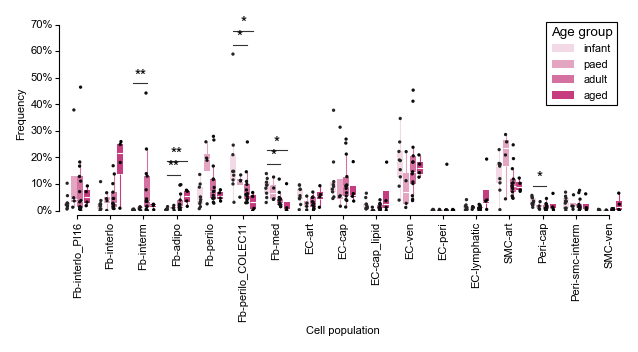

In [16]:
plot_grouped_boxplot(data = freq_df_fine, x = col_cell_type_fine, y = 'mean_prop', hue = col_age_group, 
                     order = [c for c in stroma_fine_ctypes if c in freq_df_fine[col_cell_type_fine].unique().tolist()], 
                     hue_order = col_age_group_levels, x_label = 'Cell population', y_label = 'Frequency', 
                     legend_title = 'Age group', add_stats = True, format_percent = True, 
                     figsize = (4,2.2), palette  = get_tint_palette(thyAgeing_colors['magenta']),
                     save_stats = f'{results_path}/thyAgeing_Stroma_{col_cell_type_fine}_freq_LM_style', 
                     remove_legend = False)

plt.savefig(f'{plot_path}/thyAgeing_Stroma_{col_cell_type_fine}_freq_LM_style_boxplot_pink.pdf')

Performing Kruskal-Wallis and Dunn tests


/nfs/team205/vk8/projects/thymus_ageing_atlas/General_analysis/scripts/plotting/utils.py:150: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  g = sns.stripplot(data=data, x=x, y=y, order=order, dodge=True, jitter=True, hue=hue, hue_order=hue_order, size=1.5,


<Axes: xlabel='Cell population', ylabel='Frequency'>

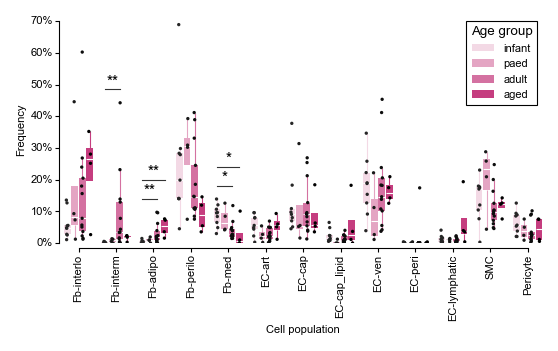

In [17]:
plot_grouped_boxplot(data = freq_df_broad, x = col_cell_type_broad, y = 'mean_prop', hue = col_age_group, 
                     order = [c for c in stroma_broad_ctypes if c in freq_df_broad[col_cell_type_broad].unique().tolist()], 
                     hue_order = col_age_group_levels, x_label = 'Cell population', y_label = 'Frequency', 
                     legend_title = 'Age group', add_stats = True, format_percent = True, 
                     figsize = (3.5,2.2), palette  = get_tint_palette(thyAgeing_colors['magenta']),
                     save_stats = f'{results_path}/thyAgeing_Stroma_{col_cell_type_broad}_freq_LM_style', 
                     remove_legend = False)

plt.savefig(f'{plot_path}/thyAgeing_Stroma_{col_cell_type_broad}_freq_LM_style_boxplot_pink.pdf')

Performing Kruskal-Wallis and Dunn tests


/nfs/team205/vk8/projects/thymus_ageing_atlas/General_analysis/scripts/plotting/utils.py:150: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  g = sns.stripplot(data=data, x=x, y=y, order=order, dodge=True, jitter=True, hue=hue, hue_order=hue_order, size=1.5,


<Axes: xlabel='Cell population', ylabel='Frequency'>

[Text(0, 0.01, '1%'), Text(0, 0.1, '10%'), Text(0, 1.0, '100%')]

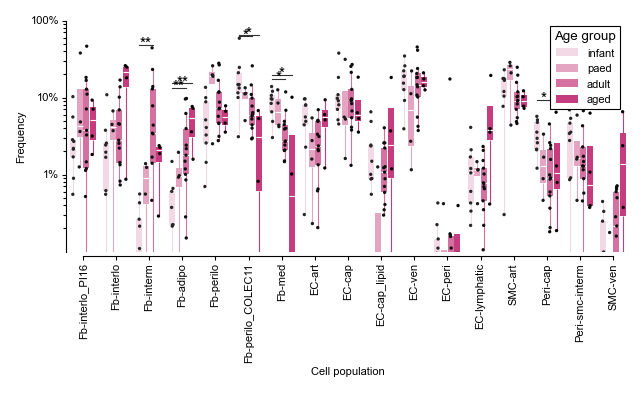

In [21]:
plot_grouped_boxplot(data = freq_df_fine, x = col_cell_type_fine, y = 'mean_prop', hue = col_age_group, 
                     order = [c for c in stroma_fine_ctypes if c in freq_df_fine[col_cell_type_fine].unique().tolist()], 
                     hue_order = col_age_group_levels, x_label = 'Cell population', y_label = 'Frequency', 
                     legend_title = 'Age group', add_stats = True, format_percent = True, 
                     figsize = (4,2.5), palette  = get_tint_palette(thyAgeing_colors['magenta']),
                     remove_legend=False,
                     format_log=True, ylim=[0.001, 1],
                     annotator_args = dict(line_offset = 10, text_offset = -3, line_offset_to_group = 20))
plt.gca().set_yticks([0.01, 0.1, 1])
plt.gca().set_yticklabels(['1%', '10%', '100%'])

plt.savefig(f'{plot_path}/thyAgeing_Stroma_{col_cell_type_fine}_freq_log_LM_style_boxplot_pink.pdf')

Performing Kruskal-Wallis and Dunn tests


/nfs/team205/vk8/projects/thymus_ageing_atlas/General_analysis/scripts/plotting/utils.py:150: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  g = sns.stripplot(data=data, x=x, y=y, order=order, dodge=True, jitter=True, hue=hue, hue_order=hue_order, size=1.5,


<Axes: xlabel='Cell population', ylabel='Frequency'>

[Text(0, 0.01, '1%'), Text(0, 0.1, '10%'), Text(0, 1.0, '100%')]

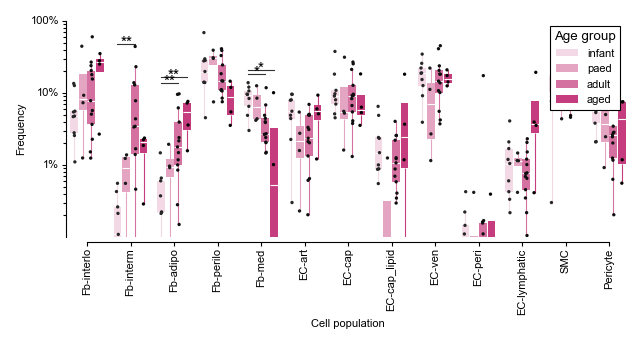

In [22]:
plot_grouped_boxplot(data = freq_df_broad, x = col_cell_type_broad, y = 'mean_prop', hue = col_age_group, 
                     order = [c for c in stroma_broad_ctypes if c in freq_df_broad[col_cell_type_broad].unique().tolist()], 
                     hue_order = col_age_group_levels, x_label = 'Cell population', y_label = 'Frequency', 
                     legend_title = 'Age group', add_stats = True, format_percent = True, 
                     figsize = (4,2.2), palette  = get_tint_palette(thyAgeing_colors['magenta']),
                     remove_legend = False, format_log=True, ylim=[0.001, 1],
                     annotator_args = dict(line_offset = 10, text_offset = -3, line_offset_to_group = 20))
plt.gca().set_yticks([0.01, 0.1, 1])
plt.gca().set_yticklabels(['1%', '10%', '100%'])

plt.savefig(f'{plot_path}/thyAgeing_Stroma_{col_cell_type_broad}_freq_LM_style_log_scale_boxplot_pink.pdf')

### Plot stacked barplots of frequencies

In [11]:
# Load columns and cell type levels
col_cell_type_broad = 'taa_l3'
col_cell_type_fine = 'taa_l4'
stroma_broad_ctypes = get_ct_levels(col_cell_type_broad, taa_l1=['Fb', 'EC', 'Mural'])
stroma_fine_ctypes = get_ct_levels(col_cell_type_fine, taa_l1=['Fb', 'EC', 'Mural'])
col_age_group = 'age_group'
col_age_group_levels = eval(f'{col_age_group}_levels')

Latest file: thyAgeing_full_curatedAnno_v11_2025-08-29_levels.xlsx
Latest file: thyAgeing_full_curatedAnno_v11_2025-08-29_levels.xlsx


In [13]:
fb_broad_ctypes = get_ct_levels(col_cell_type_broad, taa_l1=['Fb'])
vasc_broad_ctypes = get_ct_levels(col_cell_type_broad, taa_l1=['EC', 'Mural'])

Latest file: thyAgeing_full_curatedAnno_v11_2025-08-29_levels.xlsx
Latest file: thyAgeing_full_curatedAnno_v11_2025-08-29_levels.xlsx


In [14]:
adata_stroma = adata[adata.obs['taa_l1'].isin(['Fb', 'EC', 'Mural']),].copy()

In [15]:
sample_cnts = adata_stroma.obs['sample'].value_counts()
filtered_samples = sample_cnts[sample_cnts>100].index.tolist()
# Create anno df
anno_df = adata_stroma.obs[['sample', 'donor', 'sex', 'sort', 'study', col_age_group, 'age_months' ,col_cell_type_broad, col_cell_type_fine]].copy()
anno_df_filt = anno_df[(anno_df['sample'].isin(filtered_samples))].copy()
anno_df_filt.head()


sample donor sex          sort  \
TA13072046-ACACCCTTCAGCACAT  A67-THY-0-SC-FACS-3_5GEX   A67   M  EPCAM+CD205+   
TA13072046-GCATGTACATGTAGTC  A67-THY-0-SC-FACS-3_5GEX   A67   M  EPCAM+CD205+   
TA13072046-CCGGTAGTCAGCTTAG  A67-THY-0-SC-FACS-3_5GEX   A67   M  EPCAM+CD205+   
TA13072046-GGCCGATCAGTCGTGC  A67-THY-0-SC-FACS-3_5GEX   A67   M  EPCAM+CD205+   
TA13072046-CGATCGGGTACGCTGC  A67-THY-0-SC-FACS-3_5GEX   A67   M  EPCAM+CD205+   

                                     study age_group age_months      taa_l3  \
TA13072046-ACACCCTTCAGCACAT  Thymus_ageing     adult        240  Fb-interlo   
TA13072046-GCATGTACATGTAGTC  Thymus_ageing     adult        240  Fb-interlo   
TA13072046-CCGGTAGTCAGCTTAG  Thymus_ageing     adult        240  Fb-interlo   
TA13072046-GGCCGATCAGTCGTGC  Thymus_ageing     adult        240  Fb-interlo   
TA13072046-CGATCGGGTACGCTGC  Thymus_ageing     adult        240  Fb-interlo   

                                 taa_l4  
TA13072046-ACACCCTTCAGCACAT  Fb-interlo  
TA13072046-GCATGTACATGTAGTC  Fb-interlo  
TA13072046-CCGGTAGTCAGCTTAG  Fb-interlo  
TA13072046-GGCCGATCAGTCGTGC  Fb-interlo  
TA13072046-CGATCGGGTACGCTGC  Fb-interlo

In [33]:
freq_df_broad = freq_by_donor(anno_df_filt.loc[anno_df_filt['taa_l3'].isin(fb_broad_ctypes)], sample_col = 'sample', 
                            donor_col = 'donor', summary_col='taa_l3', 
                            add_meta = [col_age_group])
freq_agg = freq_df_broad.groupby([col_age_group, 'taa_l3'], observed=True).agg(mean_prop = ('mean_prop', 'mean'), sd_prop = ('mean_prop', 'std')).reset_index()
freq_tot = freq_df_broad.groupby(['age_group'], observed=True).agg(mean_prop = ('mean_prop', 'sum')).reset_index()

In [36]:
freq_df_broad.groupby(['age_group'], observed=True).nunique()

donor  taa_l3  mean_prop  sd_prop
age_group                                   
adult         13       5         65       45
aged           4       5         20       10
infant         9       5         40        5
paed           4       5         19        5

In [34]:
freq_tot

age_group  mean_prop
0     adult       13.0
1      aged        4.0
2    infant        9.0
3      paed        4.0

In [37]:
def calc_plot_stacked_bar(obs_df, col_age_group_levels, cell_type_col, broad_ctypes, save_path = f'{plot_path}/thyAgeing_StromaSplit_relfreqBroad_stackedbar.pdf'):
    freq_df_broad = freq_by_donor(obs_df.loc[obs_df[cell_type_col].isin(broad_ctypes)], sample_col = 'sample', 
                             donor_col = 'donor', summary_col=cell_type_col, 
                             add_meta = [col_age_group])
    freq_agg = freq_df_broad.groupby([col_age_group, cell_type_col], observed=True).agg(mean_prop = ('mean_prop', 'mean'), sd_prop = ('mean_prop', 'std')).reset_index()
    freq_tot = freq_df_broad.groupby(['age_group'], observed=True).nunique()
   # freq_df_broad.groupby([col_age_group], observed=True)['mean_prop'].describe()
    print(freq_tot)
    freq_agg['rel_prop'] = freq_agg.groupby('age_group', observed=True)['mean_prop'].transform(lambda x: x / x.sum())
    thyAgeing_colors = pd.read_csv('/nfs/team205/lm25/thymus_projects/thymus_ageing_atlas/General_analysis/scripts/plotting/thyAgeing_colors.csv').set_index('color_name')['hex'].to_dict()
    # Plot
    plt.figure(figsize=calc_figsize(width = 60, height = 40))
    freq_agg_sorted = freq_agg.copy()
    freq_agg_sorted[cell_type_col] = pd.Categorical(freq_agg_sorted[cell_type_col], categories=broad_ctypes, ordered=True)
    freq_agg_sorted['age_group'] = pd.Categorical(freq_agg_sorted['age_group'], categories=col_age_group_levels, ordered=True)

    # Prepare data for stacked bar plot
    fig, ax = plt.subplots(figsize=calc_figsize(width = 60, height = 40))
    bottom = np.zeros(len(col_age_group_levels))

    color_dict = {k:v for k, v in zip(broad_ctypes, thyAgeing_colors.values())}

    for ct in color_dict.keys():
        values = []
        for age in col_age_group_levels:
            val = freq_agg_sorted.loc[(freq_agg_sorted[cell_type_col] == ct) & (freq_agg_sorted['age_group'] == age), 'mean_prop']
            values.append(val.values[0] if len(val) > 0 else 0)
        color = color_dict.get(ct, '#cccccc')
        ax.bar(col_age_group_levels, values, bottom=bottom, label=ct, color=color, linewidth=0.25)
        bottom += np.array(values)

    ax.set_xlabel('Age group')
    ax.set_ylabel('Mean proportion')
    ax.set_xticks(range(len(col_age_group_levels)))
    ax.set_xticklabels(col_age_group_levels, rotation=0)
    ax.legend(title='Cell type', bbox_to_anchor=(1.05, 1), loc='upper left')
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.0%}'))
    plt.tight_layout()
    plt.savefig(f'{save_path}')
    plt.show()
    return(freq_agg)

           donor  taa_l3  mean_prop  sd_prop
age_group                                   
adult         13       5         65       45
aged           4       5         20       10
infant         9       5         40        5
paed           4       5         19        5


<Figure size 187.402x125.984 with 0 Axes>

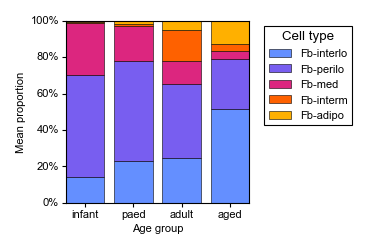

In [38]:
fb_agg2age = calc_plot_stacked_bar(obs_df = anno_df_filt, col_age_group_levels = col_age_group_levels, cell_type_col = col_cell_type_broad, 
                                   broad_ctypes = fb_broad_ctypes, save_path = f'{plot_path}/thyAgeing_FbSplit_relfreqBroad_stackedbar.pdf')

           donor  taa_l3  mean_prop  sd_prop
age_group                                   
adult         13       8        101       69
aged           4       8         31       16
infant         9       8         67        8
paed           4       8         25        7


<Figure size 187.402x125.984 with 0 Axes>

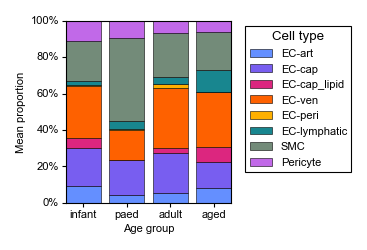

In [39]:
vasc_agg2age = calc_plot_stacked_bar(obs_df = anno_df_filt, col_age_group_levels = col_age_group_levels, cell_type_col = col_cell_type_broad, 
                                   broad_ctypes = vasc_broad_ctypes, save_path = f'{plot_path}/thyAgeing_VascSplit_relfreqBroad_stackedbar.pdf')

In [59]:
len(stroma_broad_ctypes)

13

In [40]:
def calc_plot_ctype_totals(adata, col_age_group_levels, l1_ctypes, save_path = f'{plot_path}/thyAgeing_TECSplit_TOT_counts_mean2donor_bar.pdf'):
    tec_totals = adata.obs.loc[(adata.obs['sort']=='TOT') & (adata.obs['taa_l1'].isin(l1_ctypes))].groupby(['age_group', 'sample'], observed = True).size().reset_index(name='n_cells')
    tec_totals = tec_totals.merge(adata.obs[['sample', 'donor']].drop_duplicates(), on = 'sample', how = 'left')
    tec_totals['n_cells2donor'] = tec_totals.groupby('donor', observed=True)['n_cells'].transform('mean')
    tec_totals.drop(['sample', 'n_cells'], axis = 1, inplace = True)
    tec_mean_tot = tec_totals.groupby('age_group', observed=True)['n_cells2donor'].describe()[['mean']]
    # Prepare data for stacked bar plot
    fig, ax = plt.subplots(figsize=calc_figsize(width = 60, height = 20))
    ax.bar(x = col_age_group_levels, height = tec_mean_tot.loc[col_age_group_levels,'mean'].tolist(), color = 'orange')
    ax.set_xlabel('Age group')
    ax.set_ylabel('Cells per donor\n(TOT sort)')
    ax.set_xticks(range(len(col_age_group_levels)))
    ax.set_xticklabels(col_age_group_levels, rotation=0)
    plt.tight_layout()
    plt.savefig(f'{save_path}')
    plt.show()
    return(tec_totals)

In [ ]:
['Fb', 'EC', 'Mural']

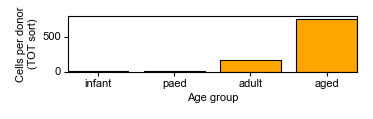

age_group  donor  n_cells2donor
0      adult    A16        32.9375
1      adult    A16        32.9375
2      adult    A16        32.9375
3      adult    A16        32.9375
4      adult    A16        32.9375
5      adult    A16        32.9375
6      adult    A16        32.9375
7      adult    A16        32.9375
8      adult    A16        32.9375
9      adult    A16        32.9375
10     adult    A16        32.9375
11     adult    A16        32.9375
12     adult    A16        32.9375
13     adult    A16        32.9375
14     adult    A16        32.9375
15     adult    A16        32.9375
16     adult    A43        73.5000
17     adult    A43        73.5000
18     adult    A45        41.0000
19     adult    A51       906.0000
20     adult    A53       387.0000
21     adult    A56        59.0000
22     adult    A66         3.0000
23     adult    A67       568.0000
24     adult    A70      1057.0000
25     adult    A72        20.0000
26     adult    A74       579.5000
27     adult    A74       579.5000
28     adult  Thy13         4.0000
29     adult  Thy14        25.0000
30      aged  Thy15      1420.0000
31      aged  Thy16        90.0000
32    infant    T07        31.5000
33    infant    T07        31.5000
34    infant  Thy10         7.0000
35    infant  Thy12         4.0000
36    infant   Thy8        18.0000
37    infant   Thy9         4.0000
38    infant    U48        15.0000
39      paed    Z12         5.5000
40      paed    Z12         5.5000
41      paed    Z13         8.5000
42      paed    Z13         8.5000
43      paed    Z16        12.0000
44      paed    Z17         3.5000
45      paed    Z17         3.5000
46      paed    Z19         4.0000

In [ ]:
fb_tots = calc_plot_ctype_totals(adata = adata, col_age_group_levels = col_age_group_levels, 
                       l1_ctypes =['Fb'] , save_path = f'{plot_path}/thyAgeing_FbSplit_TOT_counts_mean2donor_bar.pdf')

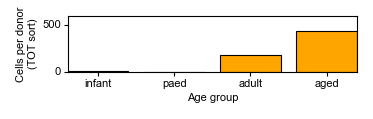

age_group  donor  n_cells2donor
0      adult    A16      28.285714
1      adult    A16      28.285714
2      adult    A16      28.285714
3      adult    A16      28.285714
4      adult    A16      28.285714
5      adult    A16      28.285714
6      adult    A16      28.285714
7      adult    A16      28.285714
8      adult    A16      28.285714
9      adult    A16      28.285714
10     adult    A16      28.285714
11     adult    A16      28.285714
12     adult    A16      28.285714
13     adult    A16      28.285714
14     adult    A43     107.000000
15     adult    A43     107.000000
16     adult    A51    1227.000000
17     adult    A53      42.000000
18     adult    A56      26.000000
19     adult    A66      11.000000
20     adult    A67     379.000000
21     adult    A70    1660.000000
22     adult    A74     334.000000
23     adult    A74     334.000000
24     adult  Thy13      14.000000
25     adult  Thy14       7.000000
26      aged  Thy15     719.000000
27      aged  Thy16     163.000000
28    infant    T07      38.500000
29    infant    T07      38.500000
30    infant  Thy10       4.000000
31    infant  Thy11       3.000000
32    infant   Thy5       1.000000
33    infant   Thy8       7.000000
34    infant    U48       5.000000
35    infant    Z11       6.000000
36      paed    Z13       6.000000
37      paed    Z16       4.000000
38      paed    Z17       3.000000
39      paed    Z19       3.000000

In [42]:
calc_plot_ctype_totals(adata = adata, col_age_group_levels = col_age_group_levels, 
                       l1_ctypes =['EC', 'Mural'] , save_path = f'{plot_path}/thyAgeing_VascSplit_TOT_counts_mean2donor_bar.pdf')

### Steroid gene plotting

In [24]:
steroid_lig_dict = {'progesterone': ['CYP11A1'], 
                    'estrogen_all': ['CYP19A1', 'HSD17B1'],
                    'androgen_all': ['CYP17A1', 'CYB5A'],
                    'androgen_testo1': ['CYP17A1','CYB5A', 'HSD17B3'],
                    'androgen_testo2': ['CYP17A1','CYB5A', 'AKR1C3'],
                    'cortisol': ['CYP21A2', 'CYP11B1'],
                    'vitamin_d': ['CYP27B1'],
                    'aldosterone': ['CYP11B2'],
                   }

In [25]:
steroid_rec_dict = {'progesterone': ['PGR', 'PAQR5', 'PAQR6', 'PAQR7', 'PAQR8', 'PAQR9'], 
                    'estrogen_all': ['ESR1', 'ESR2', 'GPER1'],
                    'androgen_all': ['AR'],
                    'cortisol': ['NR3C1'],
                    'aldosterone': ['NR3C2'],
                    'vitamin_d': ['VDR'],
                   }

In [28]:
from plotting.utils import plot_grouped_boxplot,thyAgeing_colors
cmap_blend = sns.blend_palette([thyAgeing_colors['blue'], thyAgeing_colors['purple'], thyAgeing_colors['magenta'], thyAgeing_colors['orange'], thyAgeing_colors['yellow']], as_cmap=True)
        

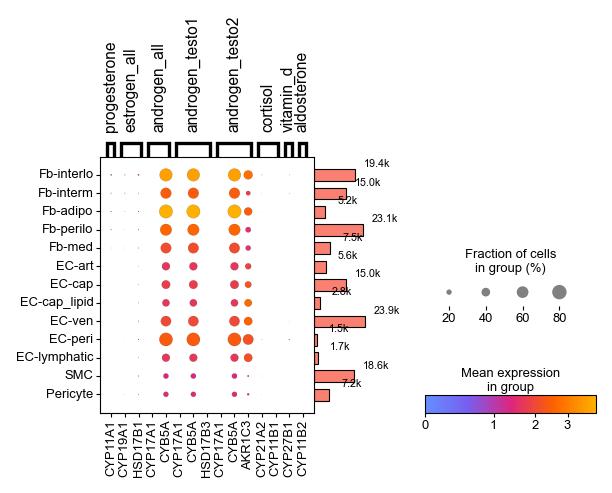

In [31]:
sc.pl.dotplot(adata_stroma,
            categories_order=[i for i in stroma_broad_ctypes if i in adata.obs['taa_l3'].unique()],
            groupby = 'taa_l3', var_names = steroid_lig_dict,
            vmin = 0, vcenter= 1.25, var_group_rotation=90, 
            swap_axes= False, mean_only_expressed=True, cmap = cmap_blend, return_fig=True, figsize=(4,2)).style(smallest_dot=0, 
            largest_dot = 40, dot_edge_lw=0.05).add_totals(size = 0.5).savefig(f'{plot_path}/thyAgeing_strom_taa-l3_steroid_ligands_dotplot_all.pdf')

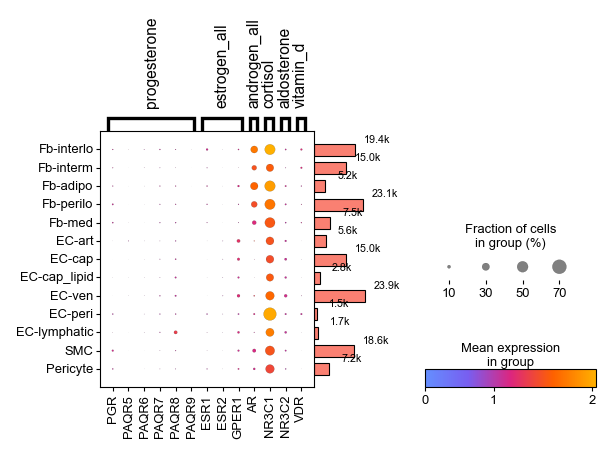

In [33]:
sc.pl.dotplot(adata_stroma,
            categories_order=[i for i in stroma_broad_ctypes if i in adata.obs['taa_l3'].unique()],
            groupby = 'taa_l3', var_names = steroid_rec_dict,
            vmin = 0, vcenter= 1.25, var_group_rotation=90, 
            swap_axes= False, mean_only_expressed=True, cmap = cmap_blend, return_fig=True, figsize=(4,2)).style(smallest_dot=0, 
            largest_dot = 40, dot_edge_lw=0.05).add_totals(size = 0.5).savefig(f'{plot_path}/thyAgeing_strom_taa-l3_steroid_receptors_dotplot_all.pdf')